## Quantum Teleportation Circuit ##

Circuit built using Qiskit to allow quantum teleportation of Qbit 0 to Qbit 2. Demonstrated by running the circuit using qasm_simulator on a Raspberry Pi device.

In [1]:
from qiskit import *
import warnings
warnings.filterwarnings('ignore') # filters warnings from notebook

/home/pi/.local/lib/python3.7/site-packages/qiskit/quantum_info/operators/pauli.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros(len(label), dtype=np.bool)
/home/pi/.local/lib/python3.7/site-packages/qiskit/quantum_info/operators/pauli.py:112: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros(len(label), dtype=np.bool)
/h

In [2]:
circuit = QuantumCircuit(3, 3) #building circuit

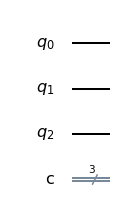

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

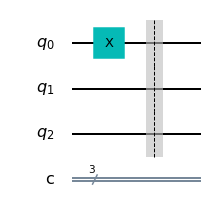

In [4]:
circuit.x(0) #adding x gate to quantum bit 0
circuit.barrier()
circuit.draw(output='mpl')

In [5]:
circuit.h(1) # adding Hadamard gate to quantum bit 1 
circuit.cx(1,2) # adding controlled x gate between Qbit 1 and 2 to allow entanglement

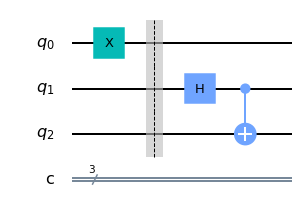

In [6]:
circuit.draw(output='mpl')

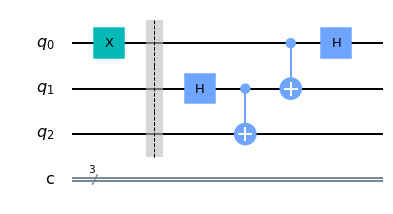

In [7]:
circuit.cx(0,1) # entangling 1 and 0 Qbits
circuit.h(0) 
circuit.draw(output='mpl')

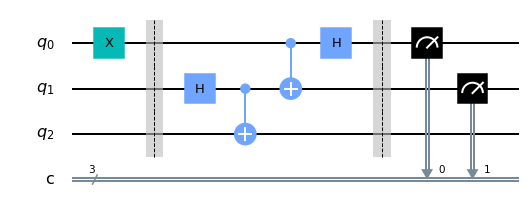

In [8]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

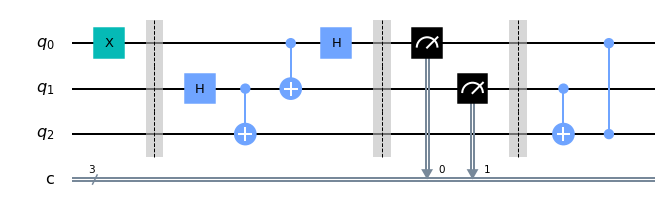

In [9]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

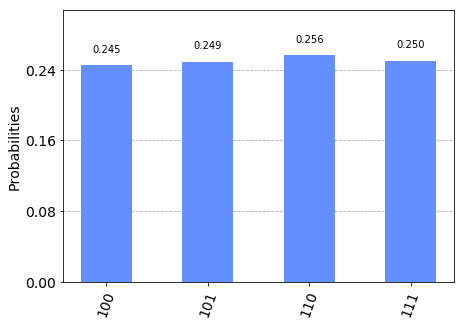

In [10]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()#results of execution on qasm simulator
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [11]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider('ibm-q')

In [13]:
qcom = provider.get_backend('ibmq_16_melbourne')

In [14]:
job = execute(circuit, backend = qcom)#define job for backend on IBM quantum device

In [15]:
from qiskit.tools.monitor import job_monitor 

In [16]:
job_monitor(job)

Job Status: job incurred error     
